1.使用Pytorch自定义类搭建神经网络

In [1]:
import torch
from torch import nn


In [2]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [3]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU() #Relu激活函数
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x


In [6]:
print(nn.Linear(2, 7))
#Linear(in_features=2, out_features=7, bias=True)


Linear(in_features=2, out_features=7, bias=True)


In [9]:
mynet = MyNeuralNet().to(device)

In [10]:
#访问每层权重和偏置
print(mynet.input_to_hidden_layer.weight)

Parameter containing:
tensor([[ 0.5968, -0.4297],
        [-0.2015,  0.2897],
        [ 0.0149, -0.5204],
        [ 0.2084,  0.5225],
        [ 0.0570,  0.0934],
        [ 0.6676,  0.1885],
        [-0.0905, -0.6643],
        [ 0.6533,  0.1918]], device='cuda:0', requires_grad=True)


In [11]:
mynet.parameters()

<generator object Module.parameters at 0x000001BE406E7BC0>

In [12]:
for param in mynet.parameters():
    print(param)

Parameter containing:
tensor([[ 0.5968, -0.4297],
        [-0.2015,  0.2897],
        [ 0.0149, -0.5204],
        [ 0.2084,  0.5225],
        [ 0.0570,  0.0934],
        [ 0.6676,  0.1885],
        [-0.0905, -0.6643],
        [ 0.6533,  0.1918]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.6845, -0.3105,  0.6295,  0.0724, -0.2143, -0.0504,  0.6114, -0.0448],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0429, -0.0031,  0.2206, -0.3056,  0.1284, -0.1364, -0.2069, -0.1522]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0731], device='cuda:0', requires_grad=True)


In [13]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.parameter(torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.parameter(torch.rand(8,1))
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x


In [14]:
loss_func = nn.MSELoss()

In [15]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)
# tensor(127.4498, device='cuda:0', grad_fn=<MseLossBackward>)

tensor(154.4984, device='cuda:0', grad_fn=<MseLossBackward0>)


In [19]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)
opt.zero_grad()
loss_value = loss_func(mynet(X),Y)
loss_value.backward()
opt.step()


In [20]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

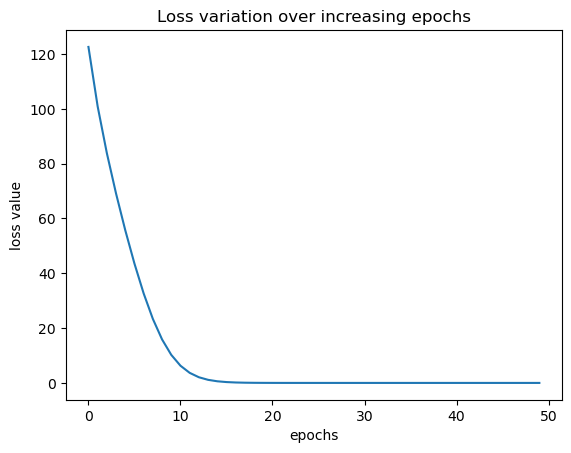

In [21]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.show()

In [22]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [23]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)


In [25]:
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x.clone().detach() # torch.tensor(x).float()
        self.y = y.clone().detach() # torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [26]:
ds = MyDataset(X, Y)

dl = DataLoader(ds, batch_size=2, shuffle=True)

In [27]:
for x, y in dl:
    print(x, y)

tensor([[7., 8.],
        [3., 4.]], device='cuda:0') tensor([[15.],
        [ 7.]], device='cuda:0')
tensor([[5., 6.],
        [1., 2.]], device='cuda:0') tensor([[11.],
        [ 3.]], device='cuda:0')


In [28]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [29]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)


In [30]:
import time
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.14562058448791504


In [32]:
#模型测试
val_x = [[10,11]]
val_x = torch.tensor(val_x).float().to(device)

print(mynet(val_x))


tensor([[20.5170]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [33]:
print(mynet.hidden_layer_activation(mynet.input_to_hidden_layer(X)))

tensor([[0.8637, 0.9351, 0.9018, 1.0552, 0.0000, 2.2851, 0.0000, 1.7234],
        [2.2096, 2.7000, 1.6767, 2.4254, 0.0000, 4.2875, 0.0000, 2.8678],
        [3.5556, 4.4650, 2.4516, 3.7956, 0.0000, 6.2898, 0.0000, 4.0122],
        [4.9015, 6.2299, 3.2265, 5.1658, 0.0000, 8.2921, 0.0000, 5.1566]],
       device='cuda:0', grad_fn=<ReluBackward0>)


In [34]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        x = self.hidden_to_output_layer(hidden2)
        return x, hidden2


In [35]:
print(mynet(X)[1])

tensor([7.1957], device='cuda:0', grad_fn=<SelectBackward0>)


2.使用sequential类搭建神经网络

In [36]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self):
        return len(self.x)

In [38]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [39]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [40]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)


0.13846373558044434


In [42]:
val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()

print(model(val.to(device)))

tensor([[16.3288],
        [19.8639],
        [ 4.8397]], device='cuda:0', grad_fn=<AddmmBackward0>)


3.模型保存和加载

In [44]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.6263, -0.1375],
        [ 0.4306,  0.0665],
        [ 0.7358,  0.6964],
        [ 0.5492,  0.1718],
        [-0.4736,  0.6812],
        [ 0.1130, -0.6280],
        [-0.1057, -0.5399],
        [-0.4484,  0.6801]], device='cuda:0')), ('0.bias', tensor([ 0.5906,  0.1329,  0.3315,  0.4814,  0.1875,  0.0026, -0.4030,  0.3129],
       device='cuda:0')), ('2.weight', tensor([[ 0.3084,  0.2298,  0.7514,  0.3838,  0.3201, -0.1800,  0.2514,  0.3591]],
       device='cuda:0')), ('2.bias', tensor([0.3451], device='cuda:0'))])


In [45]:
save_path = 'mymodel.pth'
torch.save(model.state_dict(), save_path)


In [46]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [47]:
state_dict = torch.load('mymodel.pth')

In [48]:
model.load_state_dict(state_dict)
model.to(device)

val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()
model(val.to(device))

tensor([[16.3288],
        [19.8639],
        [ 4.8397]], device='cuda:0', grad_fn=<AddmmBackward0>)